In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns; sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Copy of `cluster_eda_build_master_pca_plots`

In [3]:
df = pd.read_csv('../datasets/combined_player_stats_bio_bpm_clusters.csv', index_col=0)
df.shape
df.sample(5)

(6541, 116)

,player_id,pos,age,team_id,g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,...,cluster_2_bpm,cluster_3_bpm,cluster_4_bpm,cluster_5_bpm,cluster_6_bpm,cluster_7_bpm,cluster_8_bpm,cluster_9_bpm,cluster_10_bpm,cluster_11_bpm
player,,,,,,,,,,,,,,,,,,,,,
Rodney Stuckey 2016,stuckro01,PG,29,IND,58,1275,12.6,0.504,0.187,0.357,...,-0.0,-0.0,-0.0,-0.643157,-0.745669,-0.000000,-0.0,-0.0,-0.01069,-0.000480
Thomas Robinson 2015,robinth01,PF,23,TOT,54,798,15.3,0.502,0.008,0.408,...,-0.0,-0.0,-0.0,-0.000000,-0.000000,-1.999942,-0.0,-0.0,-0.00000,-0.000000
Jannero Pargo 2007,pargoja01,PG,27,NOK,82,1710,13.4,0.504,0.302,0.176,...,-0.0,-0.0,-0.0,-0.677916,-0.120434,-0.000000,-0.0,-0.0,-0.00000,-0.001650
Luke Kennard 2020,kennalu01,SG,23,DET,28,922,14.4,0.589,0.535,0.219,...,-0.0,-0.0,-0.0,-0.051138,-0.238617,-0.000000,-0.0,-0.0,-0.00000,-0.010245
Tony Snell 2018,snellto01,SG,26,MIL,75,2053,8.5,0.578,0.631,0.113,...,-0.0,-0.0,-0.0,-0.000000,-0.000007,-0.000000,-0.0,-0.0,-0.00000,-0.000000


## Inspect Salary missing vals (conv to float or NAN)


In [4]:
df.loc[:, 'salary'] = df['salary'].apply(lambda x: np.nan if x=='missing' else float(x))

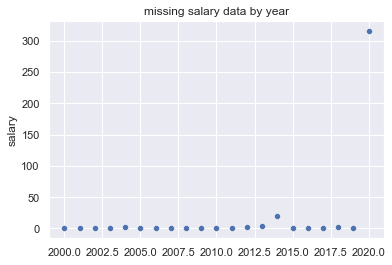

In [5]:
y = df.set_index('year')['salary'].isna().sum(level=0)
s = sns.scatterplot(x=[year for year in range(2000,2021)], y=y)
s.set_title('missing salary data by year');

In [7]:
# cl_salary_means = df.group

## Average player in each cluster

In [104]:
len(df.columns)
df.dtypes.value_counts()
cl_groups = df.groupby('label')
len(cl_groups.mean().columns)
set(df.columns)-set(cl_groups.mean().columns)

116

float64    102
int64       10
object       4
dtype: int64

111

{'label', 'nationality', 'player_id', 'pos', 'team_id'}

In [96]:
## convert position to int
df['pos'].value_counts()
# pos_dict = {'PG':1, 'SG': 2, 'SF':3,'PF':4,'C':5}

# df.loc[:, 'pos'] = df['pos'].map(pos_dict)


SG       1371
PF       1300
PG       1299
C        1243
SF       1209
SF-SG      19
PG-SG      18
PF-SF      14
C-PF       14
SG-PG      14
SG-SF      12
PF-C       12
SF-PF      11
SG-PF       4
PG-SF       1
Name: pos, dtype: int64

## Create Master player dataset by adding the principal components

In [106]:
df_pca = pd.read_csv('datasets/pca/pca99_slim_2000_to_2020.csv', index_col=0)
df_pca.shape
df_pca.sample(5)

(6541, 29)

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26,pc_27,pc_28
player,,,,,,,,,,,,,,,,,,,,,
Scott Burrell 2000,-2.710960,-1.963352,2.561816,-0.672241,-2.159495,2.128556,-0.785074,0.026241,-1.302413,1.236265,...,0.262071,0.267257,-0.486296,-0.044568,-0.128450,-0.242340,0.251290,-0.586219,0.161812,0.043672
Derrick Favors 2012,6.810037,-0.584719,-1.086449,-0.431968,1.221849,0.487625,-0.627120,-0.769253,-0.650133,0.162426,...,-0.558173,0.407654,0.731387,0.282333,-0.148789,-0.241481,0.029643,-0.385894,-0.075157,-0.123279
Brandan Wright 2013,5.674451,1.016630,1.206983,-0.902171,0.387419,-0.918518,-3.150486,1.714990,1.464435,2.082894,...,-0.594294,0.352182,0.159940,-0.820776,0.652656,-0.911335,0.012426,-0.381978,0.003521,0.252183
Udonis Haslem 2009,3.042883,-1.829665,-0.547348,-1.524038,-2.069733,-3.766863,-0.566761,1.533648,-1.445316,-0.101164,...,-0.471942,-0.695560,0.183134,-0.853658,-0.009512,0.109924,-0.119176,-0.317614,0.160596,-0.151759
Jonas Jerebko 2013,0.707543,-0.010899,0.481149,-1.086348,1.595046,2.408682,-0.205055,1.064757,0.679422,1.443879,...,-0.368474,0.311670,-0.266542,0.415852,0.403832,0.101473,0.295517,0.033822,0.225874,-0.103285


In [112]:
df_players = pd.read_csv('datasets/combined_player_stats_bio_bpm_clusters.csv', index_col=0)
df = df_players.merge(df_pca, left_index=True, right_index=True)
df.shape

df.to_csv('datasets/master_players_stats_bio_clusters_pca.csv')

(6541, 145)

In [114]:
df['pc_0'].sort_values()

player
Damon Jones 2008         -7.625142
Dee Brown 2000           -6.982841
Jason Terry 2018         -6.903950
Damon Jones 2006         -6.886633
Steve Kerr 2001          -6.816578
                           ...    
Shaquille O'Neal 2001    10.638361
DeAndre Jordan 2016      10.681439
Shaquille O'Neal 2006    10.700161
Shaquille O'Neal 2002    10.727679
Shaquille O'Neal 2005    10.951969
Name: pc_0, Length: 6541, dtype: float64

## Quick PCA plot

In [10]:
df = pd.read_csv('../datasets/master_players_stats_bio_clusters_pca.csv', index_col=0)

In [83]:
def get_player_pca_coords(df, player_name, year, dim=2):
    idx = f'{player_name} {year}'
    player = df.loc[idx, :]
    x = player['pc_0']
    y = player['pc_1']
    z = player['pc_2']
    if dim == 2:
        return (x,y)
    elif dim == 3:
        return (x,y,z)
    
def annotate_pca_plot(df, player_season_side_tups, dim):
    for player_name, season, side in player_season_side_tups:
        coords = get_player_pca_coords(df, player_name, season, dim)
        
#         text = player_name.split(' ')[-1] + ' ' + str(season)[-2:] + "'"
        text = player_name + ' ' + str(season)[-2:] + "'"
        xytext = (-15, 0) if side == 'right' else (15, 0)
        plt.annotate(text, 
                     xy=coords,
                     xycoords='data',
                     xytext=xytext,
                     textcoords='offset points',
                     size=8,
                     ha=side,
                     va="center",
                     bbox=dict(boxstyle="round", alpha=0.2),
                     arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.7, color=(0,0,0))
                     
#                      ha='center',
#                      bbox=dict(boxstyle="round", fc="none", ec="gray"),
#                      arrowprops=dict(arrowstyle="->")
                    );
    

In [12]:
coords = get_player_pca_coords(df, 'Stephen Curry', 2016, dim=2)
coords

(-2.389837201337852, 10.641287012926094)

Text(0.5, 1.0, 'Clusters by 2 Principal Components')

Text(0.5, 12.444444444444445, 'Principal Component 0 (28.3% explained var)')

Text(18.765982905982895, 0.5, 'Principal Component 1 (49.7% cum. explained var)')

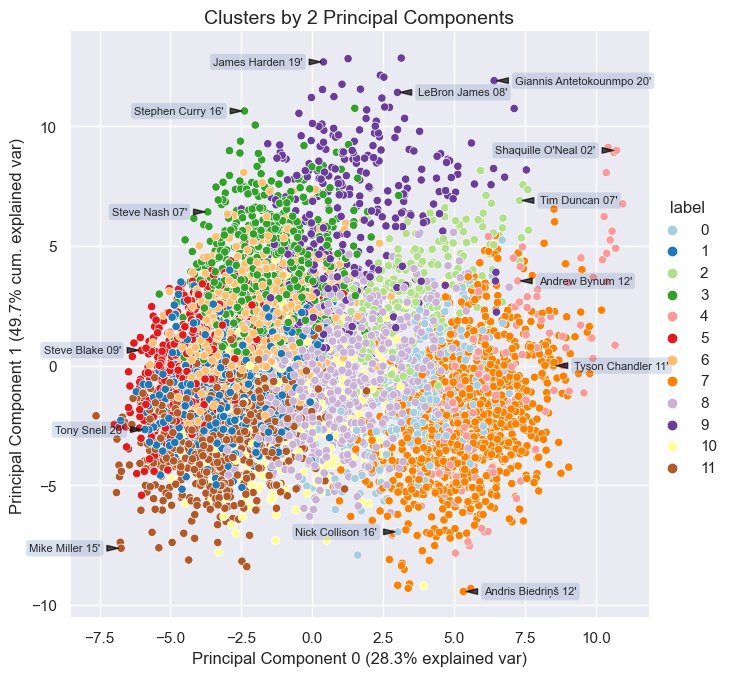

In [200]:

# plt.style.use("dark_background")
plt.style.use("default")
sns.set_theme()
sns.relplot(x='pc_0', y='pc_1', data=df, hue='label',  palette='Paired', height=6.5, aspect=1)#, size='vorp')
# Paired, deep

player_season_side_tups = [('Stephen Curry', 2016, 'right'),
                      ('James Harden', 2019, 'right'),
#                       ('Russell Westbrook', 2017),
                      ("Shaquille O'Neal", 2002, 'right'),
                      
#                       ('Jason Terry', 2018, 'right'),
#                       ('DeAndre Jordan', 2009, 'left'),
                    ('Andris Biedriņš', 2012, 'left'),
                    
                      
                    ('Mike Miller', 2015, 'right'),
                    
                      ('Steve Blake', 2009, 'right'),
                   ('Tony Snell', 2020, 'right'),
                           
#                            ('Lamar Odom', 2011, 'left'),
                           ('Tyson Chandler', 2011, 'left'),
                
                    ("Nick Collison", 2016, 'right'),
                    
#                    ('Chris Andersen', 2014, 'left'),
                
                    ('Giannis Antetokounmpo', 2020, 'left'),
                    ('Tim Duncan', 2007, 'left'),
                    
#                    ('LeBron James', 2019, 'left'),
                   ('LeBron James', 2008, 'left'),
#                     ('Chris Bosh', 2008, 'left')
#                     ('Chris Andersen', 2011, 'left'),
                           ('Steve Nash', 2007, 'right'),
                    ('Andrew Bynum', 2012, 'left')
                     ]


annotate_pca_plot(df, player_season_side_tups, dim=2)

plt.title('Clusters by 2 Principal Components', fontsize=14)
plt.xlabel('Principal Component 0 (28.3% explained var)')
plt.ylabel('Principal Component 1 (49.7% cum. explained var)');


plt.savefig('../plots/pca_players_annotated.png', bbox_inches='tight')

In [14]:
df.loc[:, ['pc_0', 'pc_1']].sum(axis=1).sort_values()

player
Mike Miller 2015             -14.374742
DeShawn Stevenson 2012       -14.153405
Terrance Ferguson 2020       -13.027554
Rashad Vaughn 2016           -12.616781
DeAndre Liggins 2018         -12.480654
                                ...    
Giannis Antetokounmpo 2020    18.322575
Shaquille O'Neal 2003         18.433231
Shaquille O'Neal 2001         19.543871
Shaquille O'Neal 2000         19.557288
Shaquille O'Neal 2002         19.722213
Length: 6541, dtype: float64

In [159]:
# df.loc[:, ['pc_0', 'pc_1', 'label']].sort_values(by='pc_1', ascending=True)[0:30]
df[df['label']==0][['pc_0', 'pc_1']].sort_values(by='pc_1', ascending=True)[0:50]

,pc_0,pc_1
player,,
Dominic McGuire 2008,1.605020,-7.921315
Nick Collison 2016,3.019685,-6.951623
Ryan Bowen 2008,1.726699,-6.073031
Johnny O'Bryant 2016,0.814430,-6.018756
Rafael Araújo 2005,2.533379,-5.659447
Tony Battie 2005,2.639158,-5.555654
Trenton Hassell 2010,-0.125151,-5.351759
Adam Keefe 2001,1.684295,-5.351482
Francisco Elson 2009,2.243967,-5.345859


Text(0.5, 1.0, 'Clusters by 2 principal components and bpm')

Text(0.5, 12.444444444444445, 'Principal Component 0 (28.3% explained var)')

Text(18.798907585470076, 0.5, 'Principal Component 1 (49.7% cum. explained var)')

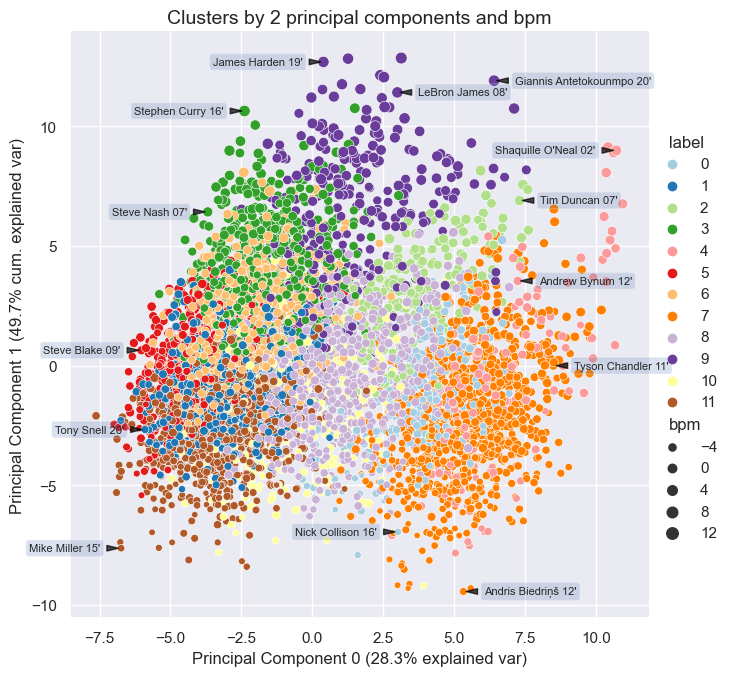

In [166]:

# plt.style.use("dark_background")
# plt.style.use("default")


# fig, ax = plt.subplots(figsize=(20,20))

sns.relplot(x='pc_0', y='pc_1', data=df, hue='label',  palette='Paired', size='bpm', height=6.5, aspect=1)
# Paired, deep

# plt.annotate('Steph Curry', xy=coords,  xycoords='data',
#              xytext=(-30, 0), textcoords='offset points',
#              size=8, ha='right', va="center",
#              bbox=dict(boxstyle="round", alpha=0.1),
#              arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));


player_season_side_tups = [('Stephen Curry', 2016, 'right'),
                      ('James Harden', 2019, 'right'),
#                       ('Russell Westbrook', 2017),
                      ("Shaquille O'Neal", 2002, 'right'),
                      
#                       ('Jason Terry', 2018, 'right'),
#                       ('DeAndre Jordan', 2009, 'left'),
                    ('Andris Biedriņš', 2012, 'left'),
                    
                      
                    ('Mike Miller', 2015, 'right'),
                    
                      ('Steve Blake', 2009, 'right'),
                   ('Tony Snell', 2020, 'right'),
                           
#                            ('Lamar Odom', 2011, 'left'),
                           ('Tyson Chandler', 2011, 'left'),
                
                    ("Nick Collison", 2016, 'right'),
                    
#                    ('Chris Andersen', 2014, 'left'),
                
                    ('Giannis Antetokounmpo', 2020, 'left'),
                    ('Tim Duncan', 2007, 'left'),
                    
#                    ('LeBron James', 2019, 'left'),
                   ('LeBron James', 2008, 'left'),
#                     ('Chris Bosh', 2008, 'left')
#                     ('Chris Andersen', 2011, 'left'),
                           ('Steve Nash', 2007, 'right'),
                    ('Andrew Bynum', 2012, 'left')
                     ]



annotate_pca_plot(df, player_season_side_tups, dim=2)


plt.title('Clusters by 2 principal components and bpm', fontsize=14)
plt.xlabel('Principal Component 0 (28.3% explained var)')
plt.ylabel('Principal Component 1 (49.7% cum. explained var)')


# plt.savefig("../plots/pca_clusters_bpm.png", bbox_inches='tight')
plt.savefig("../plots/pca_players_annotated_bpm.png", bbox_inches='tight')

### Experiment with 3d plot

Text(0.5, 0.92, 'Clusters by 3 principal components')

Text(0.5, 0, 'PC 0 (28.3% explained var)')

Text(0.5, 0, 'PC 1 (49.7% cum. explained var)')

Text(0.5, 0, 'PC 2 (58.8% cum. explained var)')

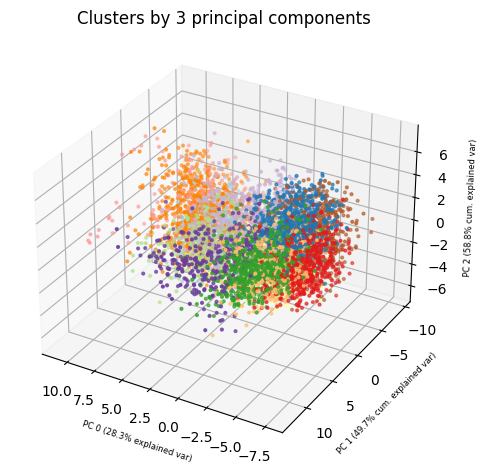

In [180]:
plt.style.use("default")
# plt.style.use("dark_background")
# plt.style.use("white")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['pc_0'], df['pc_1'], df['pc_2'], c=df['label'], s=4, cmap='Paired');
ax.set_title('Clusters by 3 principal components')
ax.set_xlabel('PC 0 (28.3% explained var)', fontsize=6)
ax.set_ylabel('PC 1 (49.7% cum. explained var)', fontsize=6)
ax.set_zlabel('PC 2 (58.8% cum. explained var)', fontsize=6)

# plt.legend();
plt.tight_layout()
ax.view_init(30, 120);
# plt.show();

fig.savefig('../plots/pca_plots/3d/pca_3d_first.png', bbox_inches='tight')

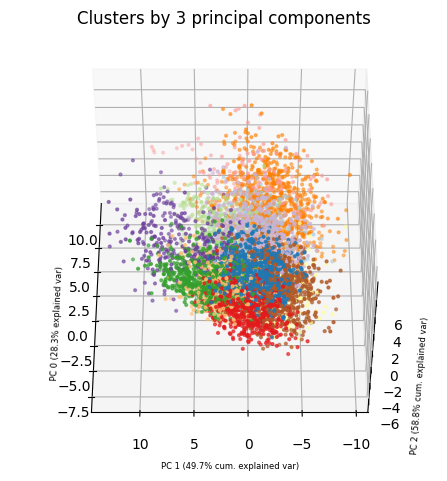

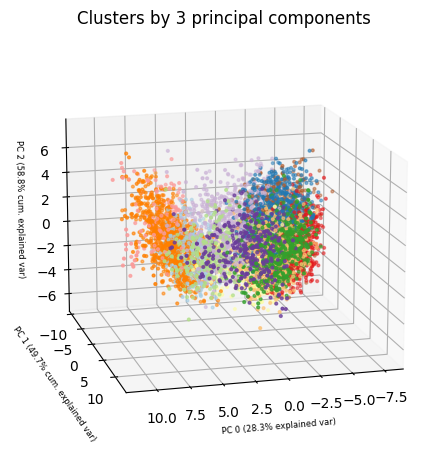

In [197]:
ax.view_init(50, 180);
fig
fig.savefig('../plots/pca_plots/3d/pca_3d_second.png', bbox_inches='tight')

### Similar to looking at 2d picture with a little bit of depth
ax.view_init(15, 75);
fig

fig.savefig('../plots/pca_plots/3d/pca_3d_third.png', bbox_inches='tight')